## 1 激活函数

在上一节使用神经网络实现鸢尾花识别时，输出层的神经元都使用到了一个前向传播公式 $$y = X * W + b$$

其中，$y$ 为输出结果，$X$ 为输入特征向量，$W$ 为权重，$b$ 为偏置项。

从公式中可以看出，这是一个线性函数，对于线性函数来说，即使有多层神经元首尾相接构成深层神经网络，依旧是线性组合，模型的表达能力不够。从而引出了**激活函数**的概念。

激活函数就是一类非线性函数，其作用就是将其非线性特性引入到神经网络中，从而加强神经网络的表达能力。也正是由于非线性激活函数的加入，使得多层神经网络不再是输入 $X$ 的线性组合，神经网络可以随层数的增加提升表达能力。定义非线性激活函数 $f$,则输出 $y$ 的结果可表示为 $$y = f(X * W + b)$$

### 1.1 什么样的激活函数更优秀？

优秀的激活函数需要具有以下特点：
 + **非线性**：激活函数非线性时，多层神经网络可逼近所有函数
 + **可微性**：优化器大多用梯度下降更新参数
 + **单调性**：当激活函数是单调的，能保证单层网络的损失函数是凸函数
 + **近似恒等性**：f(x)≈x 当参数初始化为随机小值时，神经网络更稳定
 
激活函数输出值也有如下特点：
 + 激活函数输出为**有限值**时，权重对特征的影响会更显著，基于梯度的优化方法更新参数会更稳定
 + 激活函数输出为**无限值**时，因为参数的初始值对模型的影响特别大，因此建议调小学习率

### 1.2 常用激活函数

常见的激活函数有：sigmoid，tanh，ReLU，Leaky ReLU，softmax等，下面介绍几个典型的激活函数：

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-10, 10, 100)
# 函数求导公式
def diff(f, x):
    h = 1e-12
    return (f(x + h) - f(x - h)) / (2 * h)

In [5]:
# 绘制激活函数图像和激活函数求导后的图像
def draw_subplot(ax, x, y, title=''):
    ax.set_title(title)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))
    ax.plot(x, y)
    
def draw(f, x):
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(121)
    draw_subplot(ax1, x, f(x), "Function Image")
    
    ax2 = fig.add_subplot(122)
    draw_subplot(ax2, x, diff(f, x), "Derivative Function Image")
    plt.show()

### 1.2.1 sigmoid 函数

$$f(x)=\frac{1} {1+e^{-x}}$$

 + TensorFlow API: `tf.math.sigmoid`
 + Keras API: `tf.keras.activations.sigmoid`

**优点**：
1. 输出映射在(0,1)之间，单调连续，输出范围有限，优化稳定，可用作输出层；
2. 求导容易。

**缺点**：
1. 易造成梯度消失
 + 深层神经网络更新参数时，需要从输出层到输入层逐层进行链式求导，而 sigmoid 函数的导数（如下图右）输出范围是 0 到 0.25 之间的小数，链式求导需要多层导数连续相乘，因此这会出现多个 0 到 0.25 的数连续相乘，结果将趋于 0，产生梯度消失，使得参数无法继续更新。
2. 输出非 0 均值，收敛慢
 + 因为过 sigmoid 激活函数后的数据都是正数，因此输出是非 0 均值，这会使收敛变慢。
3. 幂运算复杂，训练时间长。

sigmoid 函数可应用在训练过程中。然而，当处理分类问题作出输出时，sigmoid 却无能为力。简单地说，sigmoid 函数只能处理两个类，不适用于多分类问题。而  softmax 可以有效解决这个问题，并且 softmax 函数大都运用在神经网路中的最后一层网络中，使得值得区间在（0,1）之间，而不是二分类的。

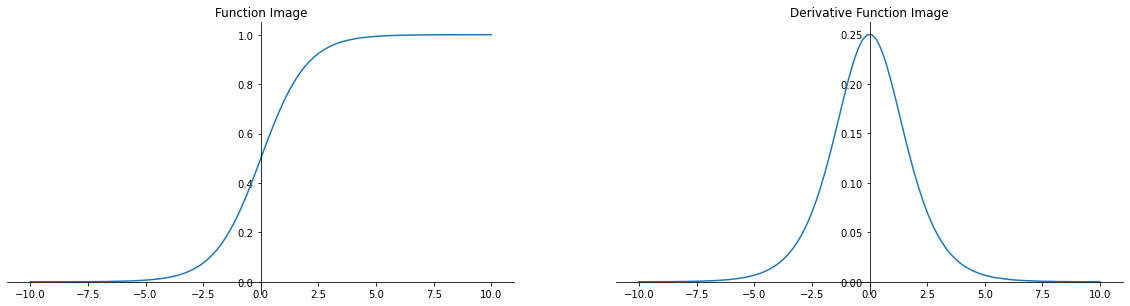

In [6]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
draw(sigmoid, x)

### 1.2.2 tanh 函数
$$f(x) = \frac {1 - e^{-2x}} {1 + e^{-2x}}$$

+ TensorFlow API: `tf.math.tanh`
+ Keras API: `tf.keras.activations.tanh`

优点：
1. 比 sigmoid 函数收敛速度更快。
2. 相比 sigmoid 函数，其输出以 0 为中心。

缺点：
1. 易造成梯度消失；
2. 幂运算复杂，训练时间长。

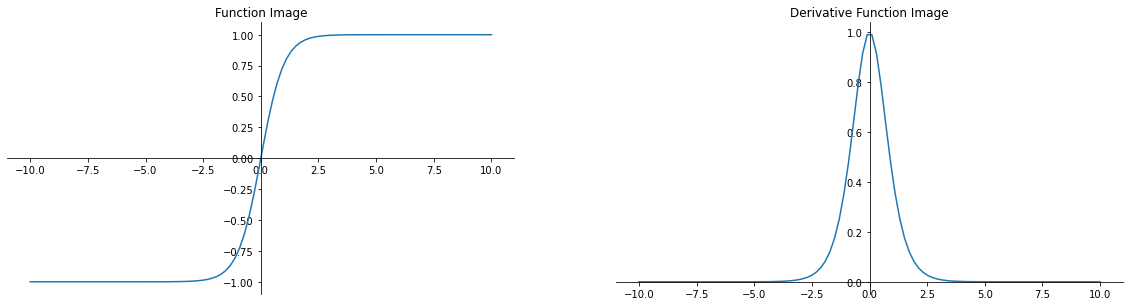

In [7]:
tanh = lambda x : (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))
draw(tanh, x)

### 1.2.3 ReLu 函数

$$f(x)=max(x, 0)=\left\{\begin{matrix}
0, x<0\\ x, x\geq 0
\end{matrix}\right.$$

TensorFlow API: `tf.nn.relu`
Keras API: `tf.keras.activations.relu

优点：
1. 解决了梯度消失问题(在正区间)；
2. 只需判断输入是否大于0，计算速度快；
3. 收敛速度远快于 sigmoid 和 tanh，因为 sigmoid 和 tanh 涉及很多 expensive 的操作；
4. 提供了神经网络的稀疏表达能力。

缺点：
1. 输出非 0 均值，收敛慢；
2. Dead ReLU 问题：某些神经元可能永远不会被激活，导致相应的参数永远不能被更新。

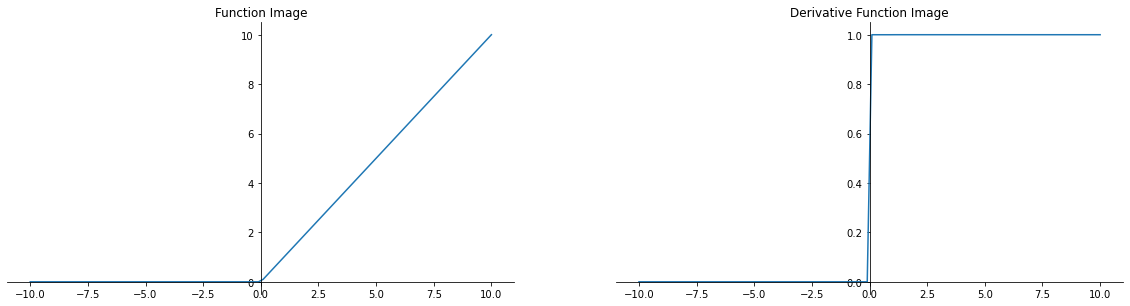

In [8]:
relu = lambda x: 1 * (x > 0) * x
# 导函数图像稍微有点偏差，x=0时，y应该为 0
draw(relu, x)

### 1.2.4 Leaky ReLu 函数
$$f(x)=max(\alpha x, x)$$

TensorFlow API: `tf.nn.leaky_relu(x)`

理论上来讲，Leaky ReLU 有 ReLU 的所有优点，外加不会有 Dead ReLU 问题，但是在实际操作当中，并没有完全证明 Leaky ReLU 总是好于ReLU。

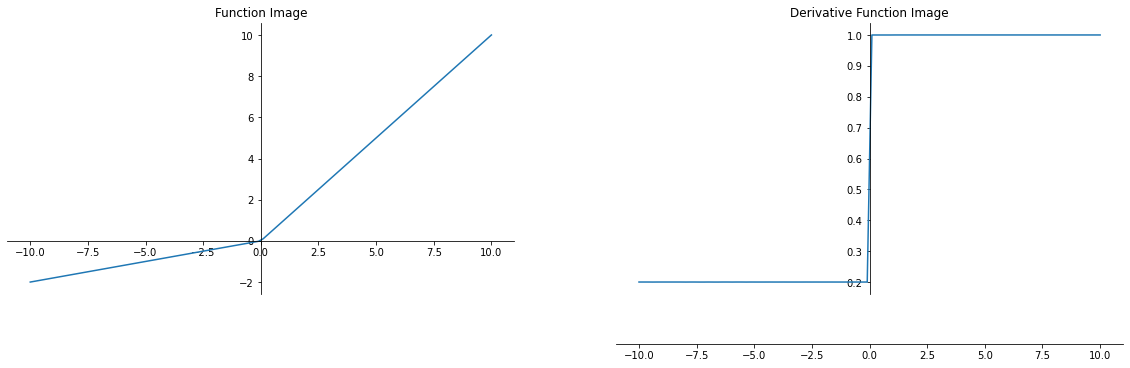

In [9]:
alpha = 0.2
leaky_relu = lambda x: np.maximum(alpha * x, x)
# 导函数图像稍微有点偏差，x=0时，y应该为 0
draw(leaky_relu, x)

### 1.2.5 softmax函数

$$\sigma(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N}e^{x_j}}$$

+ TensorFlow API: `tf.nn.softmax`
+ Keras API: `tf.keras.activations.softmax`

对神经网络全连接层输出进行变换，使其服从概率分布，即每个值都位于[0,1]区间且和为1。

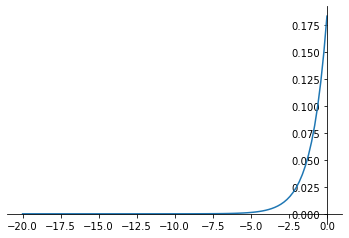

In [10]:
def softmax(x):
    constant_shift = np.max(x)
    x -= constant_shift
    x = np.exp(x)
    normalize = np.sum(x)
    x /= normalize
    return x
ax = plt.figure().add_subplot(111)
draw_subplot(ax, x, softmax(x))

## 1.3 建议

对于初学者的建议：

1. 首选 ReLU 激活函数；
2. 学习率设置较小值；
3. 输入特征标准化，即让输入特征满足以 0 为均值，1 为标准差的正态分布；
4. 初始化问题：初始参数中心化，即让随机生成的参数满足以 0 为均值，$\sqrt{\frac{2}{the\ size\ of\ input\ vector}}$ 为标准差的正态分布。